In [1]:
import pandas as pd

file="/home/sr933/rcc/data/LightGBM_Features.csv"
data=pd.read_csv(file)

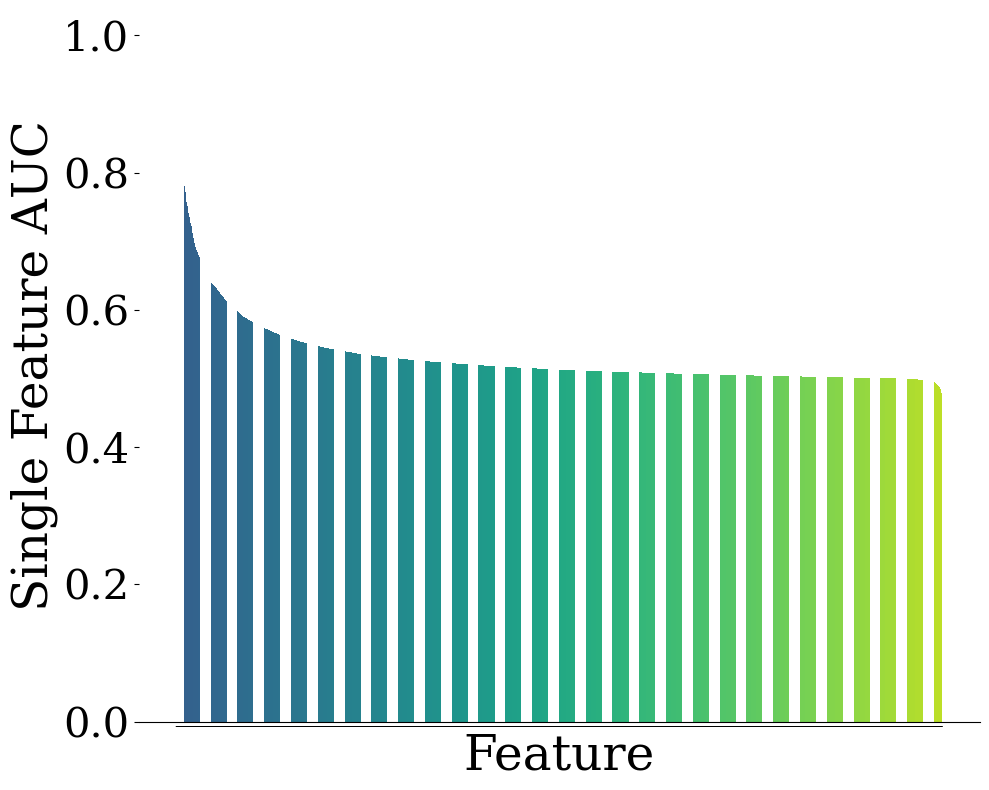

In [3]:
import matplotlib.pyplot as plt
import numpy as np
params = {
        "ytick.color": "black",
        "xtick.color": "black",
        "axes.labelcolor": "black",
        "axes.edgecolor": "black",
        "text.usetex": False,
        "font.family": "serif",
        "font.sans-serif": "Helvetica",
    }
plt.rcParams.update(params)
sorted_feat=pd.Series(data["AUC"]).sort_values(ascending=False)

# Extract feature names and AUC scores
features = sorted_feat.index
auc_scores = sorted_feat.values

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot with a color gradient
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(features)))
bars = ax.bar(range(len(features)), auc_scores, color=colors, width=0.6)

# Set axis labels and title
ax.set_ylabel("Single Feature AUC", fontsize=35)
ax.set_xlabel("Feature", fontsize=35)
ax.set_xticks(range(len(features)))
ax.set_xticklabels(features, fontsize=0)  # Optional if labels are already set but not visible
ax.tick_params(axis="x", which="both", length=0)  # Make x-tick marks invisible

# Customize spines and ticks
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
ax.tick_params(axis="y", labelsize=30)

plt.tight_layout()

save_path = "/home/sr933/output/feature_sel_auc.png"  # Replace with your desired file path
plt.savefig(save_path, format="png", bbox_inches="tight", dpi=900)

<Figure size 640x480 with 0 Axes>

In [2]:
import pickle

# Define the path to the .pkl file
input_path = "/data/sr933/scRCC/combined_data/RCC_data_dict.pkl"

# Load the dictionary from the .pkl file
with open(input_path, "rb") as f:
    data_dict = pickle.load(f)
gene_list = data_dict["Genes"]

In [3]:
threshold=0.8
filtered_df = data[data['AUC'] >= threshold]
print("Number of genes: {}".format(len(filtered_df)))

gene_id_list =  filtered_df["Unnamed: 0"].to_list()
gene_id_list = [int(item[1:]) for item in gene_id_list]

gene_list=np.asarray(gene_list)
target_genes=gene_list[gene_id_list]
print(target_genes)

# Create DataFrame with a column named "Feature ID"
feature_df = pd.DataFrame(target_genes, columns=['Genes'])
feature_df.to_csv("/home/sr933/rcc/data/Target_genes.csv", index=False)

Number of genes: 96


NameError: name 'np' is not defined

In [6]:
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Ensure 'Gene' is the first column
columns = ['Gene'] + [col for col in data.columns if col != 'Gene']
data = data[columns]

# Sort the DataFrame by the 'AUC' column in ascending order
data = data.sort_values(by='AUC', ascending=False)

# Save the DataFrame to a CSV file
data.to_csv("/home/sr933/rcc/data/Genes_with_AUC.csv", index=False)